<a href="https://colab.research.google.com/github/chrober24/A.UD_289.84_seminar/blob/main/Real_ESRGAN_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real-ESRGAN Inference

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2107.10833)
[![GitHub Stars](https://img.shields.io/github/stars/xinntao/Real-ESRGAN?style=social)](https://github.com/xinntao/Real-ESRGAN)
[![download](https://img.shields.io/github/downloads/xinntao/Real-ESRGAN/total.svg)](https://github.com/xinntao/Real-ESRGAN/releases)

a pretrained model (*RealESRGAN_x4plus.pth*) with upsampling X4.<br>
**Note that RealESRGAN may still fail in some cases as the real-world degradations are really too complex.**<br>
Moreover, it **may not** perform well on **human faces, text**, *etc*, which will be optimized later.
<br>



# 1. Setup
Before start, make sure that you choose
* Runtime Type = Python 3
* Hardware Accelerator = GPU

in the **Runtime** menu -> **Change runtime type**

Then, we clone the repository, set up the envrironment, and download the pre-trained model.

In [ ]:
#@title Clone Real-ESRGAN and enter the Real-ESRGAN
!git clone https://github.com/xinntao/Real-ESRGAN.git
%cd Real-ESRGAN
# Set up the environment
!pip install basicsr
!pip install facexlib
!pip install gfpgan
!pip install -r requirements.txt
!python setup.py develop
# Download the pre-trained model
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P experiments/pretrained_models

# 2. Upload Images

Upload the images to be processed by Real-ESRGAN

Run multiple times for more images

In [5]:
#@title Upload Images


import os
from google.colab import files
import shutil

upload_folder = 'upload'
result_folder = 'results'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.mkdir(upload_folder)
os.mkdir(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving A1.jpg to A1.jpg
move A1.jpg to upload/A1.jpg


# 3. Inference
Options:

`scale_factor`: factor by wchich to upscale image. (1 = no upscaling; 2 = twice as big)

`tile`: slices image into smaller pieces to perform upscaling. (use this if you get an out of memory error)


In [6]:
#@title run inference
scale_factor = 2 #@param {type: 'slider', min: 1.0, max: 5.0, step: 0.1}
tile = False #@param {type: 'boolean'}

if tile == True:
  !python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale $scale_factor --tile 
else:
  !python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale $scale_factor


Testing 0 A1


# 4. Visualization

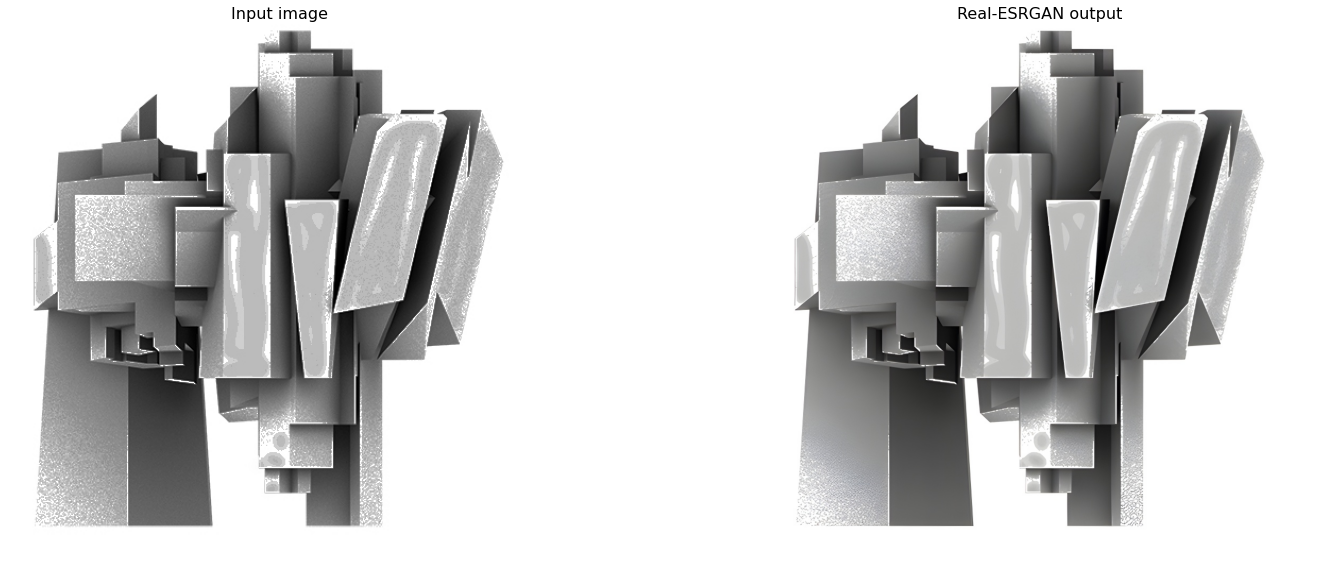

In [7]:
#@title compare input and upscaled image
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('Real-ESRGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'upload'
result_folder = 'results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

# 5. Download Results


In [8]:
#@title Download the results
zip_filename = 'Real-ESRGAN_result.zip'
if os.path.exists(zip_filename):
  os.remove(zip_filename)
os.system(f"zip -r -j {zip_filename} results/*")
files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>